In [35]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('historic_demand_2009_2024_noNaN.csv')

# Convert the 'settlement_date' column to datetime format
dataset['settlement_date'] = pd.to_datetime(dataset['settlement_date'])

# Filter data from 2018 to the last data point
dataset = dataset[dataset['settlement_date'].dt.year >= 2018]

# Set 'settlement_date' as the index
dataset.set_index('settlement_date', inplace=True)

# Resample the data to daily frequency and take the mean of specific columns
daily_data = dataset[['nd', 'england_wales_demand', 'tsd']].resample('D').mean()

# Save the daily aggregated data to a new CSV file
daily_data.to_csv('daily_energy_consumption_2018_to_last.csv')


Epoch 1/50
5/5 [==============================] - 6s 292ms/step - loss: 0.1580 - val_loss: 0.0240
Epoch 2/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0344 - val_loss: 0.0315
Epoch 3/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0251 - val_loss: 0.0232
Epoch 4/50
5/5 [==============================] - 0s 33ms/step - loss: 0.0318 - val_loss: 0.0247
Epoch 5/50
5/5 [==============================] - 0s 32ms/step - loss: 0.0292 - val_loss: 0.0205
Epoch 6/50
5/5 [==============================] - 0s 34ms/step - loss: 0.0262 - val_loss: 0.0206
Epoch 7/50
5/5 [==============================] - 0s 33ms/step - loss: 0.0243 - val_loss: 0.0193
Epoch 8/50
5/5 [==============================] - 0s 35ms/step - loss: 0.0205 - val_loss: 0.0179
Epoch 9/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0213 - val_loss: 0.0172
Epoch 10/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0195 - val_loss: 0.0171
Epoch 11/50
5/5 [===========

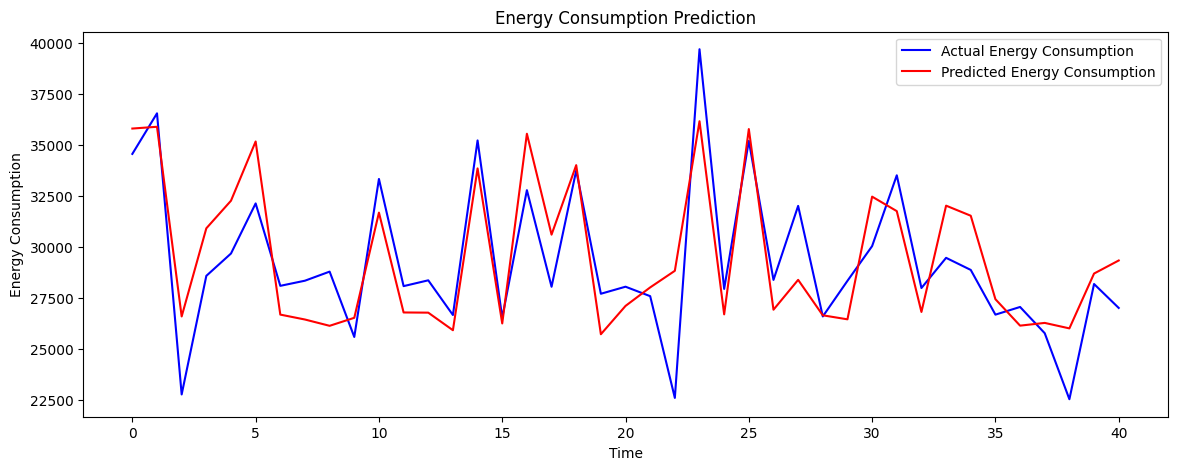

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example data loading
data = pd.read_csv('daily_energy_consumption_2018_to_last.csv')
values = data['nd'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30
X, y = create_sequences(scaled_values, seq_length)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

import matplotlib.pyplot as plt

# Inverse transform the actual y_test values
actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(actual, color='blue', label='Actual Energy Consumption')
plt.plot(predictions, color='red', label='Predicted Energy Consumption')
plt.title('Energy Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()





In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the daily data
data = pd.read_csv('daily_energy_consumption_2018_to_last.csv', index_col='settlement_date', parse_dates=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 365  # Use past year to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=y_train.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
39/39 [==============================] - 20s 386ms/step - loss: 0.0360 - val_loss: 0.0134
Epoch 2/50
39/39 [==============================] - 15s 377ms/step - loss: 0.0173 - val_loss: 0.0113
Epoch 3/50
39/39 [==============================] - 14s 354ms/step - loss: 0.0168 - val_loss: 0.0111
Epoch 4/50
39/39 [==============================] - 14s 359ms/step - loss: 0.0151 - val_loss: 0.0122
Epoch 5/50
39/39 [==============================] - 14s 371ms/step - loss: 0.0153 - val_loss: 0.0134
Epoch 6/50
39/39 [==============================] - 14s 371ms/step - loss: 0.0148 - val_loss: 0.0112
Epoch 7/50
39/39 [==============================] - 14s 369ms/step - loss: 0.0139 - val_loss: 0.0102
Epoch 8/50
39/39 [==============================] - 14s 369ms/step - loss: 0.0143 - val_loss: 0.0110
Epoch 9/50
39/39 [==============================] - 14s 351ms/step - loss: 0.0140 - val_loss: 0.0102
Epoch 10/50
39/39 [==============================] - 14s 367ms/step - loss: 0.0144 - val_lo

In [80]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual y_test values for comparison
y_test = scaler.inverse_transform(y_test)


13/13 [==============================] - 2s 119ms/step - loss: 0.0045
Test Loss: 0.004531713668256998
13/13 [==============================] - 2s 76ms/step


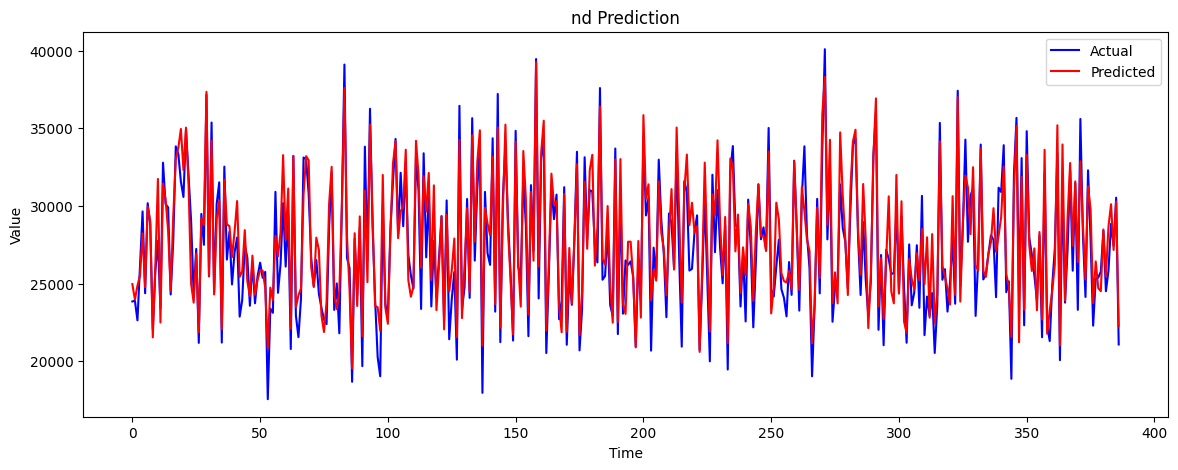

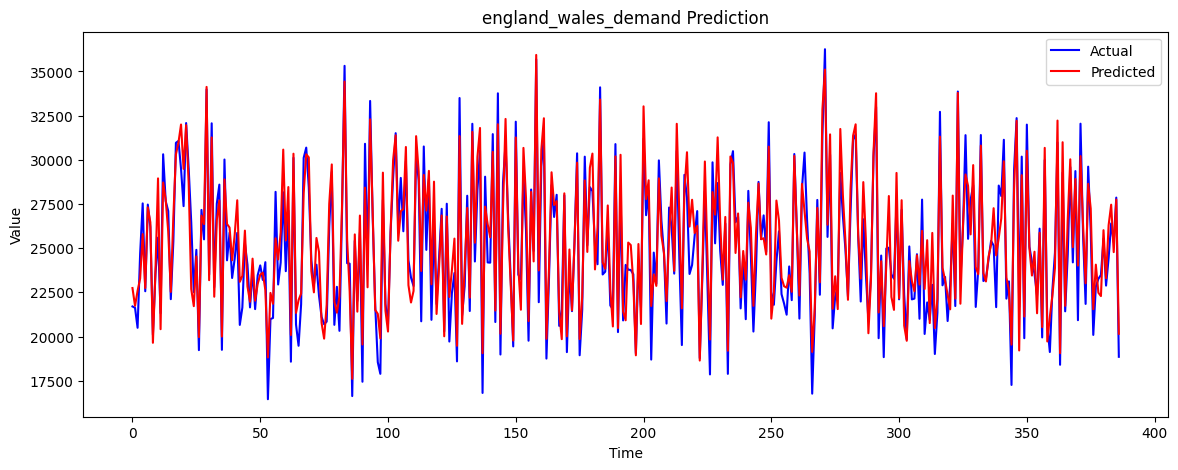

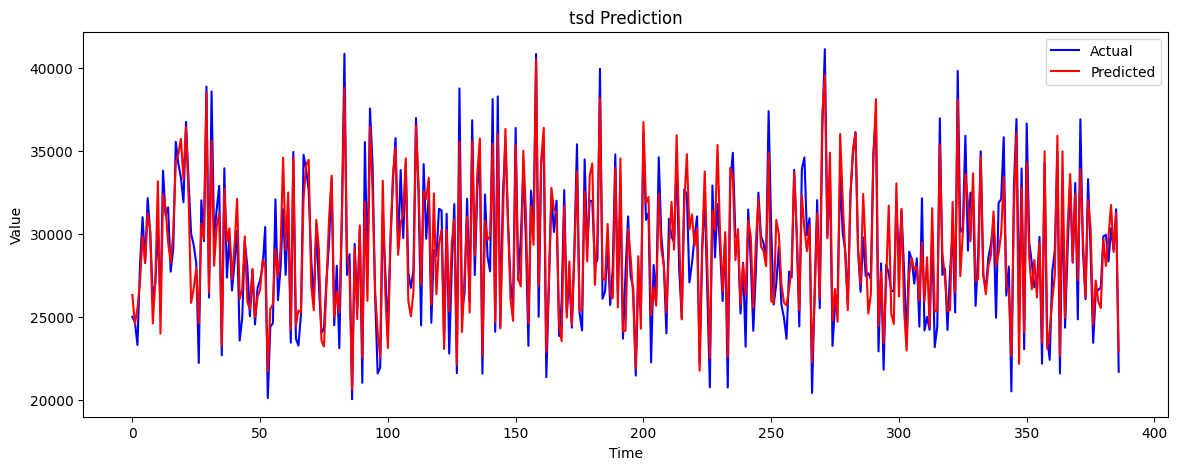

In [81]:
import matplotlib.pyplot as plt

# Plotting function
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(14, 5))
    plt.plot(y_true, color='blue', label='Actual')
    plt.plot(y_pred, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Plot results for each feature
for i, feature in enumerate(['nd', 'england_wales_demand', 'tsd']):
    plot_predictions(y_test[:, i], predictions[:, i], f'{feature} Prediction')


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y_test and predictions are numpy arrays of shape (n_samples, n_features)

# Calculate metrics for each feature
for i, feature in enumerate(['nd', 'england_wales_demand', 'tsd']):
    mae = mean_absolute_error(y_test[:, i], predictions[:, i])
    rmse = np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i]))
    mape = np.mean(np.abs((y_test[:, i] - predictions[:, i]) / y_test[:, i])) * 100
    sq_mse = mean_squared_error(y_test[:, i], predictions[:, i]) ** 2

    print(f'{feature} - Mean Absolute Error: {mae:.4f}')
    print(f'{feature} - Root Mean Squared Error: {rmse:.4f}')
    print(f'{feature} - Mean Absolute Percentage Error: {mape:.2f}%')
    print(f'{feature} - Squared Mean Squared Error: {sq_mse:.4f}')



nd - Mean Absolute Error: 1265.6538
nd - Root Mean Squared Error: 1575.3976
nd - Mean Absolute Percentage Error: 4.81%
nd - Squared Mean Squared Error: 6159716507155.9346
england_wales_demand - Mean Absolute Error: 1125.2084
england_wales_demand - Root Mean Squared Error: 1375.5658
england_wales_demand - Mean Absolute Percentage Error: 4.67%
england_wales_demand - Squared Mean Squared Error: 3580349621932.2417
tsd - Mean Absolute Error: 1251.9779
tsd - Root Mean Squared Error: 1530.8994
tsd - Mean Absolute Percentage Error: 4.38%
tsd - Squared Mean Squared Error: 5492709348903.1973


1/1 [==============================] - 0s 53ms/step


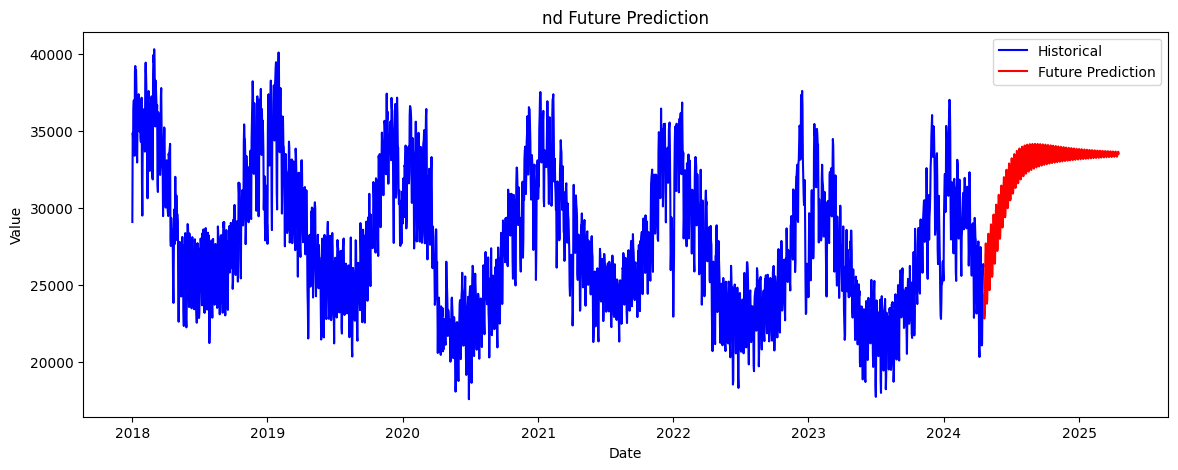

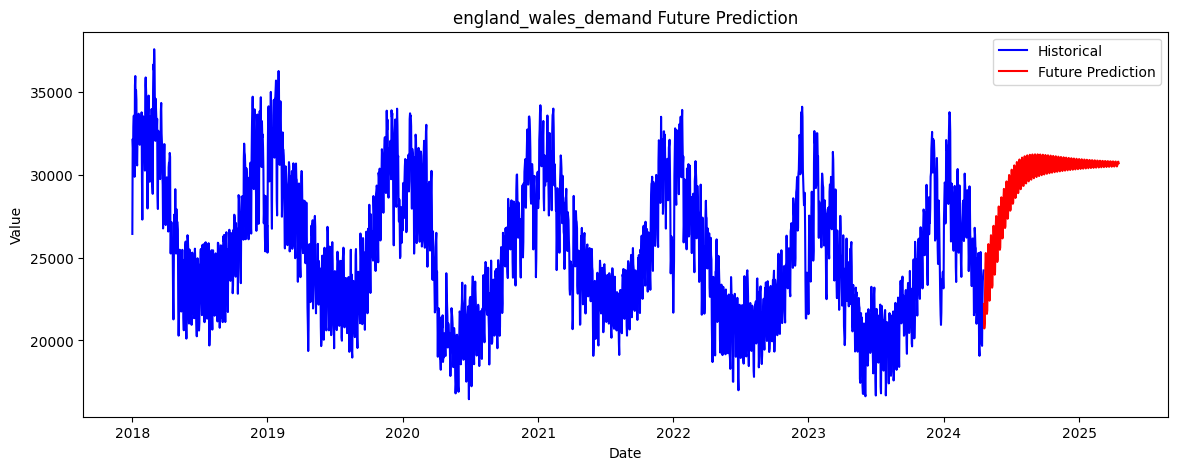

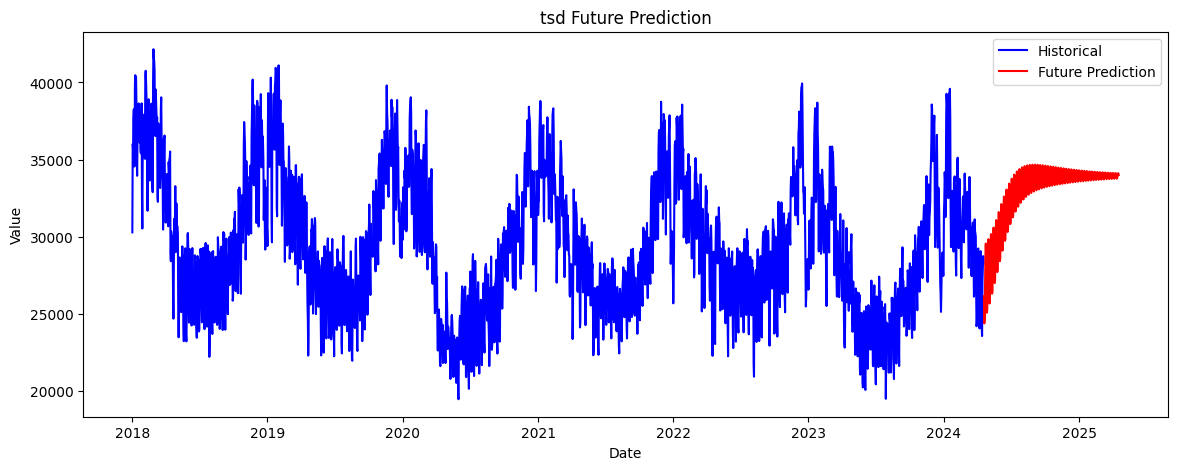

In [83]:
# Predict the next 365 days
future_steps = 365
last_sequence = scaled_data[-seq_length:]

future_predictions = []
current_sequence = last_sequence

for _ in range(future_steps):
    next_prediction = model.predict(current_sequence[np.newaxis, :, :])[0]
    future_predictions.append(next_prediction)
    current_sequence = np.append(current_sequence[1:], [next_prediction], axis=0)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(future_predictions)

# Create a date range for the future predictions
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, inclusive='right')

# Create a DataFrame for future predictions
future_df = pd.DataFrame(future_predictions, columns=['nd', 'england_wales_demand', 'tsd'], index=future_dates)

# Plot future predictions
for feature in ['nd', 'england_wales_demand', 'tsd']:
    plt.figure(figsize=(14, 5))
    plt.plot(data[feature], color='blue', label='Historical')
    plt.plot(future_df[feature], color='red', label='Future Prediction')
    plt.title(f'{feature} Future Prediction')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
